In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,M,70,175,65,89.8,0.8,1.0,1,1,...,15.5,5,1.3,29,18,53,Y,0,Y,1
1,2,M,40,170,65,86.0,1.2,1.0,1,1,...,15.3,1,1.2,26,23,21,Y,1,Y,1
2,3,M,20,170,70,83.0,1.0,1.0,1,1,...,14.2,1,1.0,17,11,12,Y,0,N,0
3,4,F,60,145,50,77.0,0.4,0.5,1,2,...,12.8,1,0.5,26,12,13,Y,0,N,0
4,5,F,40,160,70,82.9,0.9,0.7,1,1,...,13.8,1,0.9,16,25,20,Y,0,N,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   40000 non-null  int64  
 1   gender               40000 non-null  object 
 2   age                  40000 non-null  int64  
 3   height(cm)           40000 non-null  int64  
 4   weight(kg)           40000 non-null  int64  
 5   waist(cm)            40000 non-null  float64
 6   eyesight(left)       40000 non-null  float64
 7   eyesight(right)      40000 non-null  float64
 8   hearing(left)        40000 non-null  int64  
 9   hearing(right)       40000 non-null  int64  
 10  systolic             40000 non-null  int64  
 11  relaxation           40000 non-null  int64  
 12  fasting blood sugar  40000 non-null  int64  
 13  Cholesterol          40000 non-null  int64  
 14  triglyceride         40000 non-null  int64  
 15  HDL                  40000 non-null 

In [6]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,40000.0,20000.500000,11547.149720,1.0,10000.75,20000.5,30000.25,40000.0
age,40000.0,44.119875,12.062738,20.0,40.00,40.0,55.00,85.0
height(cm),40000.0,164.658875,9.201501,130.0,160.00,165.0,170.00,190.0
weight(kg),40000.0,65.890125,12.807660,30.0,55.00,65.0,75.00,135.0
waist(cm),40000.0,82.055518,9.286276,51.0,76.00,82.0,88.00,129.0
eyesight(left),40000.0,1.016643,0.503869,0.1,0.80,1.0,1.20,9.9
eyesight(right),40000.0,1.009505,0.486441,0.1,0.80,1.0,1.20,9.9
hearing(left),40000.0,1.025675,0.158166,1.0,1.00,1.0,1.00,2.0
hearing(right),40000.0,1.025700,0.158241,1.0,1.00,1.0,1.00,2.0
systolic,40000.0,121.522125,13.656314,72.0,112.00,120.0,130.00,240.0


In [7]:
train_data.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

<AxesSubplot:>

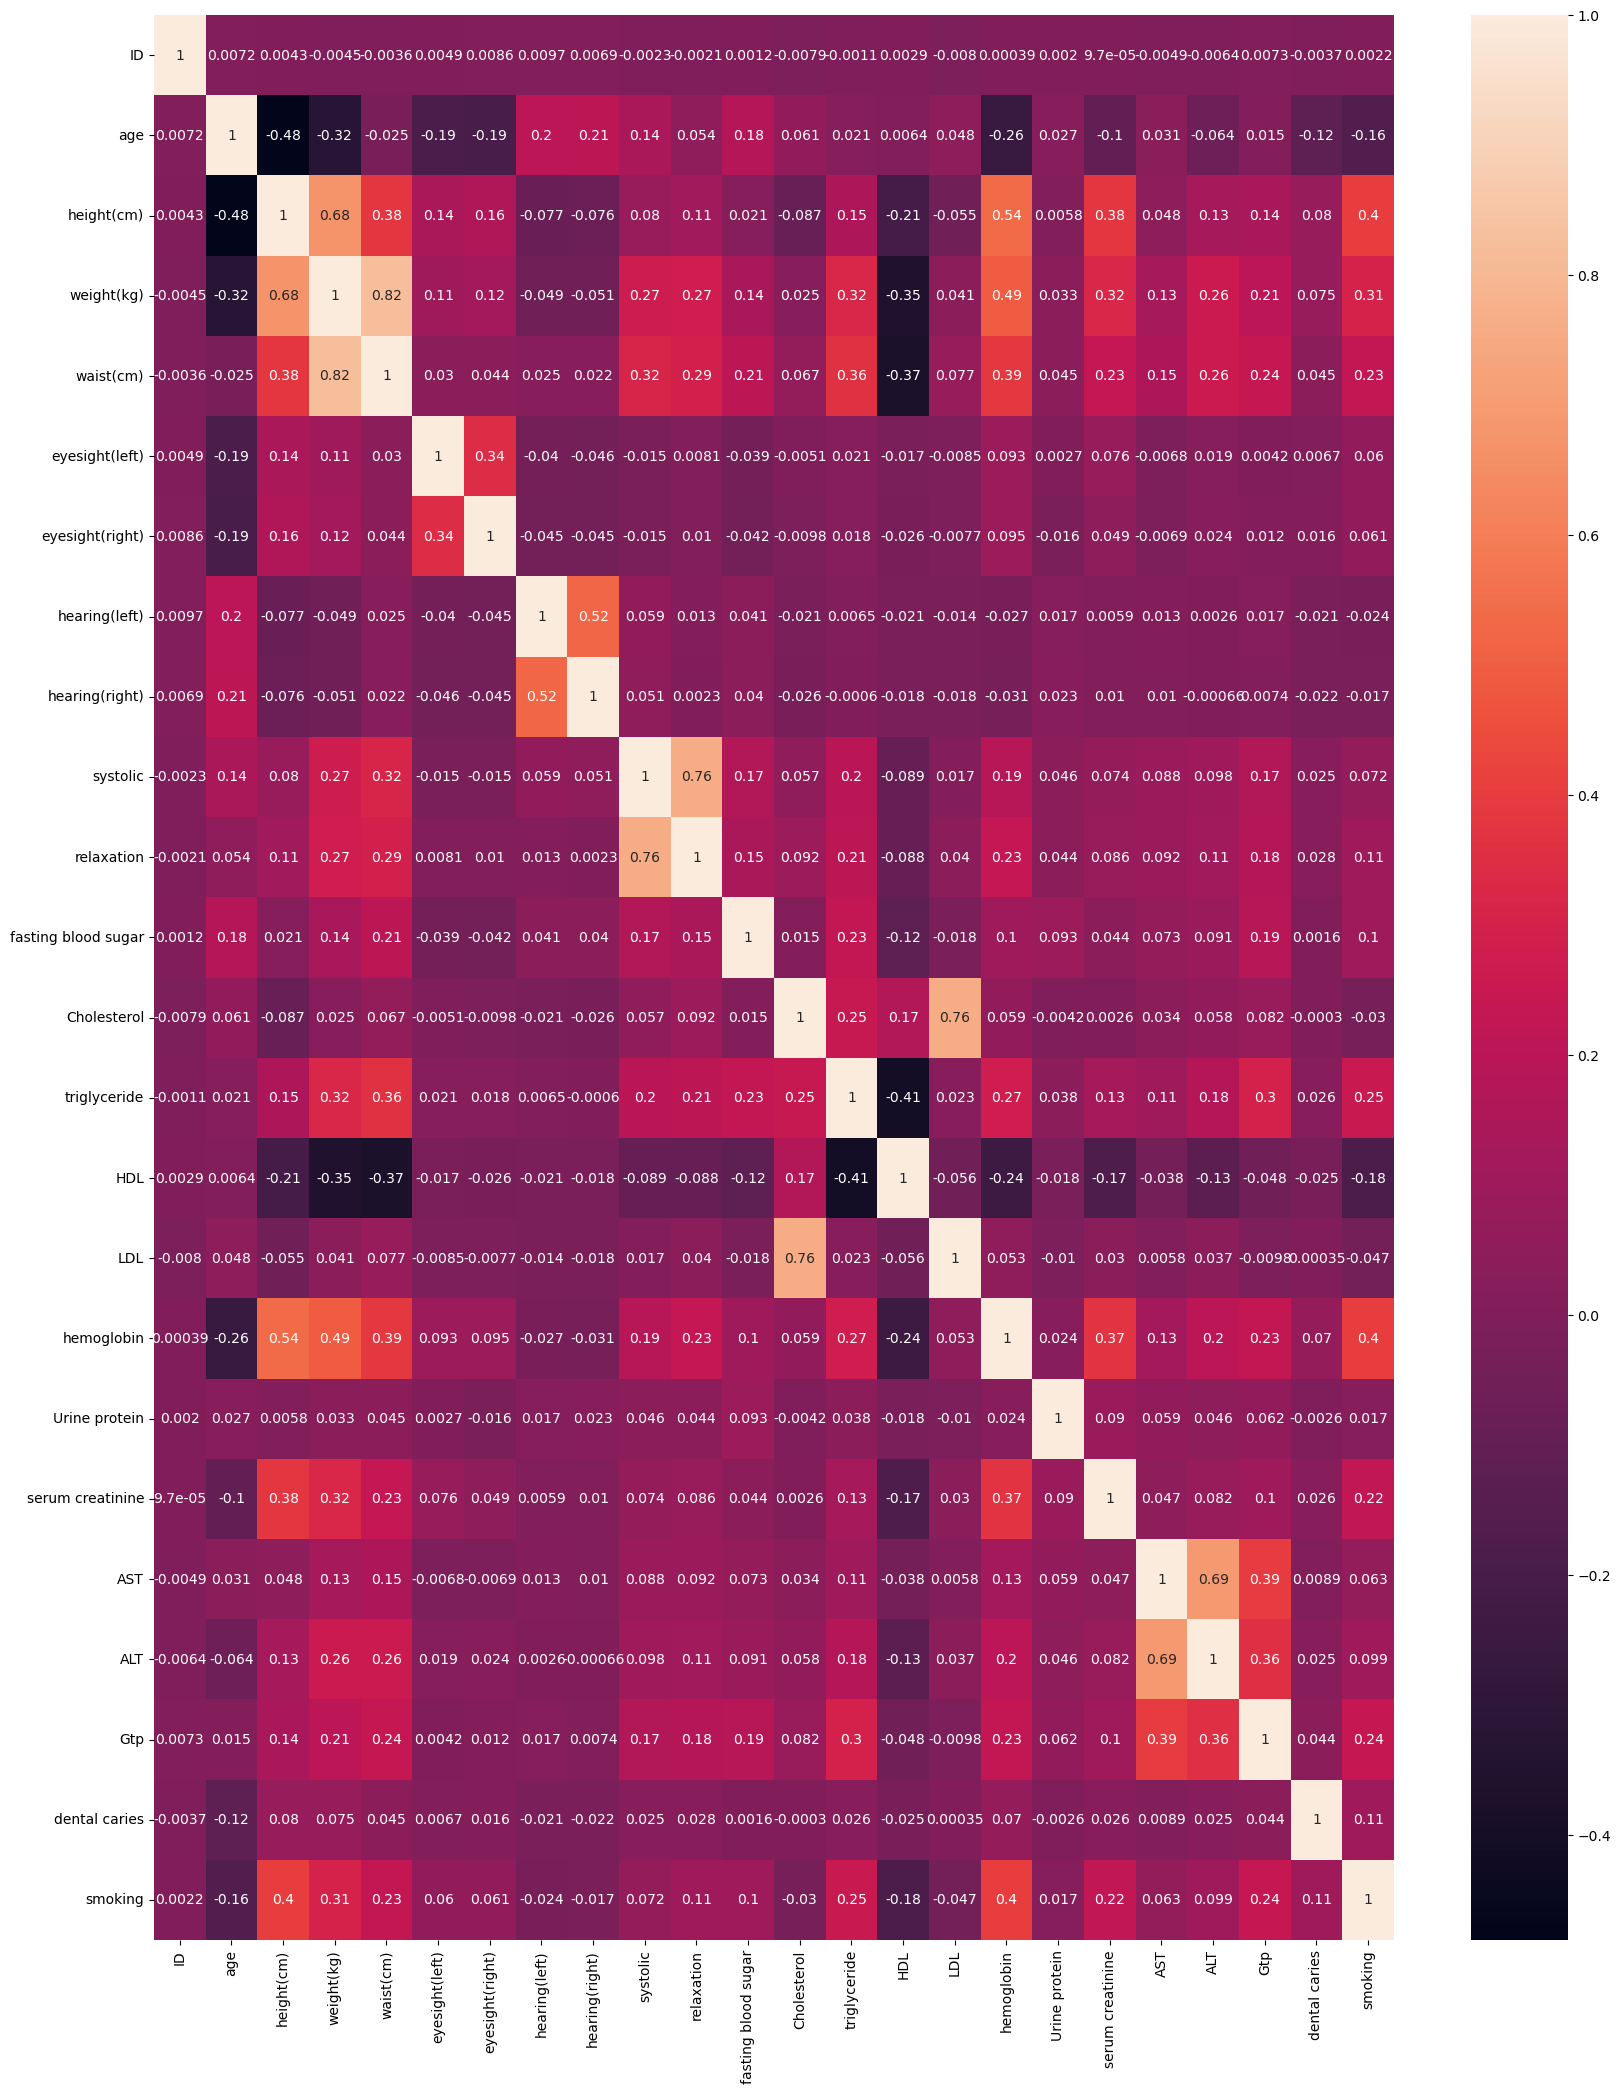

In [55]:
cor = train_data.corr()

plt.figure(figsize = (20, 25))
sns.heatmap(cor, annot = True)

Encoding and scaling the data

In [9]:
ref_train_data = train_data.drop(["ID"], axis = 1)

In [10]:
ref_test_data = test_data.drop(["ID"], axis = 1)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
oe = OrdinalEncoder()

In [13]:
ref_train_data[['gender', 'oral', 'tartar']] = oe.fit_transform(ref_train_data[['gender', 'oral', 'tartar']])

In [14]:
ref_test_data[['gender', 'oral', 'tartar']] = oe.fit_transform(ref_test_data[['gender', 'oral', 'tartar']])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = ref_train_data.drop("smoking", axis = 1)
y = ref_train_data["smoking"]

In [17]:
X

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,1.0,70,175,65,89.8,0.8,1.0,1,1,125,...,64,15.5,5,1.3,29,18,53,0.0,0,1.0
1,1.0,40,170,65,86.0,1.2,1.0,1,1,110,...,120,15.3,1,1.2,26,23,21,0.0,1,1.0
2,1.0,20,170,70,83.0,1.0,1.0,1,1,125,...,90,14.2,1,1.0,17,11,12,0.0,0,0.0
3,0.0,60,145,50,77.0,0.4,0.5,1,2,123,...,165,12.8,1,0.5,26,12,13,0.0,0,0.0
4,0.0,40,160,70,82.9,0.9,0.7,1,1,119,...,139,13.8,1,0.9,16,25,20,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.0,20,170,60,82.0,1.0,1.0,1,1,110,...,129,17.8,1,0.9,20,19,18,0.0,0,1.0
39996,1.0,30,175,80,82.0,1.5,1.5,1,1,122,...,144,14.9,2,0.8,29,40,56,0.0,1,1.0
39997,0.0,40,160,60,77.9,1.2,1.5,1,1,124,...,144,13.4,1,0.9,20,13,12,0.0,0,0.0
39998,1.0,35,175,90,101.6,1.2,1.0,1,1,136,...,80,13.8,1,0.7,27,58,42,0.0,0,0.0


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
X = sc.fit_transform(X)

In [21]:
ref_test_data = sc.transform(ref_test_data)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
#Initialising ANN
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 100, input_dim = 25, kernel_initializer='uniform', activation="relu"))

ann.add(tf.keras.layers.Dense(units=100,kernel_initializer='uniform',activation="relu"))

ann.add(tf.keras.layers.Dense(units=20,kernel_initializer='uniform',activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='uniform',activation="sigmoid"))
# ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='uniform',activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [43]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 50)

Epoch 1/50
838/838 [==============================] - 2s 1ms/step - loss: 0.4832 - accuracy: 0.7438
Epoch 2/50
838/838 [==============================] - 1s 1ms/step - loss: 0.4592 - accuracy: 0.7599
Epoch 3/50
838/838 [==============================] - 1s 2ms/step - loss: 0.4548 - accuracy: 0.7644
Epoch 4/50
838/838 [==============================] - 2s 2ms/step - loss: 0.4515 - accuracy: 0.7662
Epoch 5/50
838/838 [==============================] - 2s 2ms/step - loss: 0.4494 - accuracy: 0.7700
Epoch 6/50
838/838 [==============================] - 1s 2ms/step - loss: 0.4485 - accuracy: 0.7693
Epoch 7/50
838/838 [==============================] - 1s 2ms/step - loss: 0.4458 - accuracy: 0.7717
Epoch 8/50
838/838 [==============================] - 2s 3ms/step - loss: 0.4434 - accuracy: 0.7739
Epoch 9/50
838/838 [==============================] - 2s 2ms/step - loss: 0.4419 - accuracy: 0.7767
Epoch 10/50
838/838 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.7765

In [44]:
ann.predict(X_test)

413/413 [==============================] - 0s 911us/step


array([[0.9644676 ],
       [0.04084643],
       [0.3987357 ],
       ...,
       [0.05310752],
       [0.01327582],
       [0.01776719]], dtype=float32)

In [45]:
preds = ann.predict(X_test)
preds = (preds > 0.5)

413/413 [==============================] - 0s 874us/step


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
print(confusion_matrix(y_test,preds))

[[6858 1547]
 [1684 3111]]


In [48]:
print(accuracy_score(y_test, preds)*100)

75.52272727272728


In [49]:
ann.fit(X, y, batch_size = 32, epochs=50)

Epoch 1/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3920 - accuracy: 0.8303
Epoch 2/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3658 - accuracy: 0.8351
Epoch 3/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3578 - accuracy: 0.8392
Epoch 4/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3511 - accuracy: 0.8410
Epoch 5/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3439 - accuracy: 0.8458
Epoch 6/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3394 - accuracy: 0.8470
Epoch 7/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3328 - accuracy: 0.8508
Epoch 8/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3281 - accuracy: 0.8547
Epoch 9/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3222 - accuracy: 0.8579
Epoch 10/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.316

In [50]:
preds = ann.predict(ref_test_data)
preds = (preds > 0.5)
preds

491/491 [==============================] - 0s 872us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [51]:
l = []
smoking = []
for i in preds:
    l.append(*i)
for i in l:
    if i == True:
        smoking.append(1)
    else:
        smoking.append(0)

In [52]:
df = pd.DataFrame({"smoking":smoking})
ID = test_data["ID"]

In [53]:
result = pd.concat([ID,df], axis=1, join='inner')
display(result)

,ID,smoking
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
15687,15688,1
15688,15689,0
15689,15690,0
15690,15691,1


In [54]:
result.to_csv('results.csv', index=False)